### **Exercise1**

Write a matrix multiplication function using lists ("manually", using the matrix multiplication formula) and another one using numpy arrays (call matmul function). Time them both. 

In [159]:
a = [[1,2,3],[3,4,5]]
b = [[1,2,0],[1,1,0],[0,0,1]]

In [160]:
import math as ma

def multiply(matrix_a: list, matrix_b: list) -> list:
    return [[sum(m * n for m, n in zip(i, j)) for j in zip(*matrix_b)] for i in matrix_a]

In [161]:
%%timeit
multiply(a, b)

9.89 µs ± 422 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [162]:
import numpy as np

In [163]:
%%timeit
np.matmul(a,b)

10.6 µs ± 494 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [164]:
a1,b1 = np.array(a),np.array(b)

In [165]:
%%timeit
np.matmul(a1,b1)

2.23 µs ± 33.8 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


### **Exercise2**

Write a decorator that plots a function (of one variable) over the interval (0,100). Make sure your plot has a name, the axis names, nice color, changed background color and a legend.

Do the same using a different "interface".

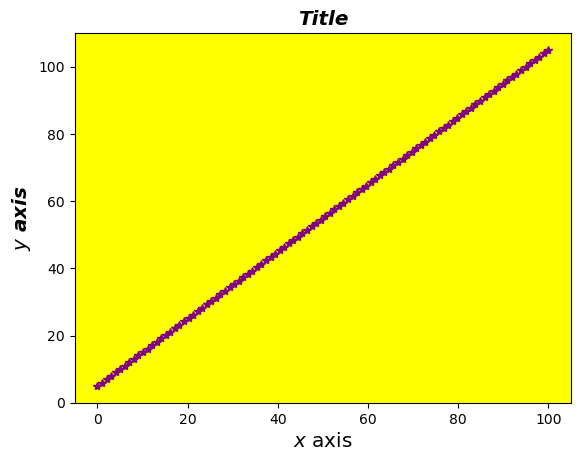

In [135]:
import numpy as np
from matplotlib import pyplot as plt

def plotit(func):
  def plotclassic(*args, **kwargs):
    args = list(args)
    x = np.linspace(0,100,100)
    args[0] = x
    y = func(*args,**kwargs)
    fig, ax = plt.subplots()
    ax.set_xlabel('$x$ axis',fontsize = 'x-large',fontstyle='normal',fontweight = 'medium')
    ax.set_ylabel('$y$ axis',fontsize = 'x-large',fontstyle='oblique',fontweight = 'heavy')
    ax.set_title('Title',fontsize = 'x-large',fontstyle='italic',fontweight='bold')
    ax.set_facecolor("yellow")
    ax.set_facecolor("yellow")
    ax.plot(x,y,linestyle='-',linewidth=0.1,color='purple',marker=('*'))
  return plotclassic

@plotit
def lala(x:list ,p:float) -> list:
  y = p*x + 5
  return y
lala(x,1)


### **Exercise3:**


Plot the recaman sequence in the following way:

Add a semi-circular arc from $a_{n}$ to $a_{n-1}$.

Alternate the arcs to be above and below the x-axis according to whether
    n is even or odd.

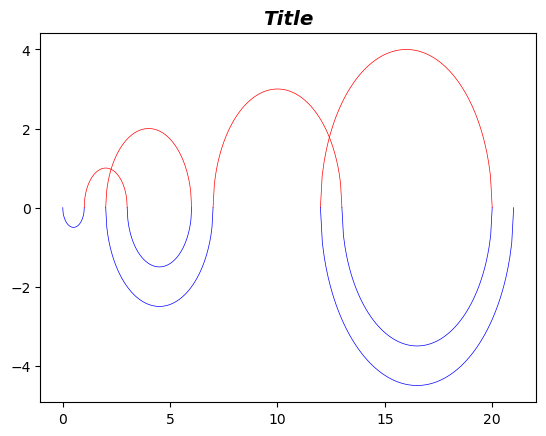

In [181]:
import numpy as np
def plott(func):
  def plotclassic(*args, **kwargs):
    args = list(args)
    r = (args[1]-args[2])/2
    x0 = args[1]-r
    x = np.linspace(x0-r,x0+r,100)
    args[0] = x 
    y = func(*args,**kwargs)
    plt.title('Title',fontsize = 'x-large',fontstyle='italic',fontweight='bold')
    #ax.set_facecolor("yellow")
    #ax.set_facecolor("yellow")
    if args[3] %2==0:
      col = 'red'
    else:
      col = 'blue'
    plt.plot(x,y,linestyle='-',linewidth=0.5,color=col)#,marker=('*'))
  return plotclassic

def recaman(max_terms):
    exist = set()
    seq=list()
    n = 0 
    a = 0
    while n < max_terms:
        diff=a-n
        if diff > 0 and diff not in exist:
            a = diff
        else:
            a = a + n
        exist.add(a)
        seq.append(a)
        n += 1
        if n>=2 :
          semicircle(x, seq[n-1], seq[n-2],n-1)
    #return seq

@plott
def semicircle(x,an,an1, n):
  r = (an-an1)/2
  x0 = an-r
  if n%2==0:
    y = np.sqrt((r)**2-(x-x0)**2)
    return y
  else :
    y = -np.sqrt((r)**2-(x-x0)**2)
    return y
    
recaman(10)

### **Exercise4:**

Plot a rainbow.

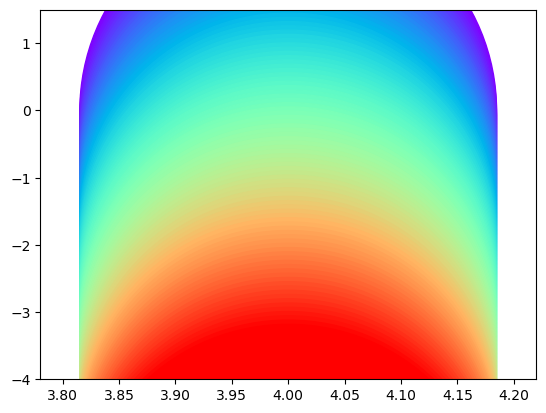

In [241]:
import matplotlib.pyplot as plt
import numpy as np

# Create a figure and axis
fig, ax = plt.subplots()

# Create a color map
cmap = plt.get_cmap('rainbow')

# Create a range of x values
x = np.linspace(0, 2 * np.pi, 100)

# Use the color map to map x values to colors
colors = cmap(x / (2 * np.pi))

# Plot the rainbow
ax.scatter(x*0+4, -x, color=colors, s=90000)
#ax.set_axis(0)
ax.set_ylim(-4,1.5)
#ax.set_xlim(3,4.05)
# Show the plot
plt.show()

### **Exercise5**

Plot a nice-looking 3-D torus. Do this 3 times with different styles. 

100 100 100


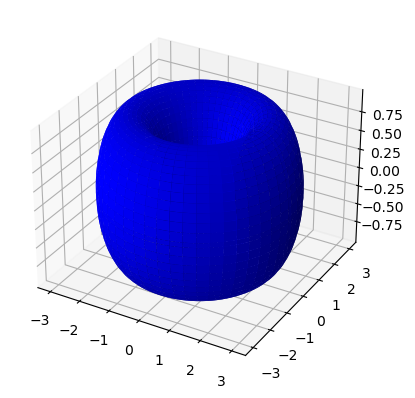

In [207]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a figure and 3D axes
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Define parameters for the torus
R = 2 # radius of the torus
r = 1 # distance from the center of the torus to the center of the tube
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, 2 * np.pi, 100)
u, v = np.meshgrid(u, v)

# Compute the coordinates of the points on the torus
x = (R + r * np.cos(v)) * np.cos(u)
y = (R + r * np.cos(v)) * np.sin(u)
#x, y = np.meshgrid(x, y)
z = r * np.sin(v)

print(len(x),len(y),len(z))

# Plot the torus
ax.plot_surface(x, y, z, color='b')

# Show the plot
plt.show()
